In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("C:\\Users\\rushikesh\\Desktop\\furniture_shop.csv")

Check missing value


In [3]:
missing_value = df.isnull().sum()
print("Missing Values:")
print(missing_value)

Missing Values:
Date of Sale            0
Product ID              0
Product Name            0
Quantity Sold           0
Price per Unit (INR)    1
Customer ID             0
Sales Channel           0
Region                  0
dtype: int64


In [4]:
# Handle missing values
# For example, fill missing numerical values with mean or median

In [5]:
df['Price per Unit (INR)'].fillna(df['Price per Unit (INR)'].median(),inplace = True) 

In [6]:
df.dropna(subset=['Customer ID'], inplace=True)

In [7]:
duplicate_rows = df[df.duplicated()]
print(duplicate_rows)

Empty DataFrame
Columns: [Date of Sale, Product ID, Product Name, Quantity Sold, Price per Unit (INR), Customer ID, Sales Channel, Region]
Index: []


In [8]:
df.drop_duplicates(inplace=True)

In [9]:
df['Date of Sale'] = pd.to_datetime(df['Date of Sale'])

convert region names to lowercase

In [10]:
df['Region'] = df['Region'].str.lower()

In [11]:
# Save the cleaned dataset

In [12]:
df.to_csv('cleaned_dataset.csv',index=False)

In [13]:
print(df.head())

  Date of Sale  Product ID  Product Name  Quantity Sold  Price per Unit (INR)  \
0   2023-01-01        1001          Sofa              2                 500.0   
1   2023-02-01        1002  Dining Table              1                 800.0   
2   2023-03-01        1003     Bed Frame              1                 600.0   
3   2023-04-01        1004      Wardrobe              3                 700.0   
4   2023-05-01        1005  Coffee Table              2                 300.0   

   Customer ID Sales Channel Region  
0          101        Online   east  
1          102      In-store   west  
2          103        Online  south  
3          104      In-store  north  
4          105        Online   east  


In [14]:
df.head()

,Date of Sale,Product ID,Product Name,Quantity Sold,Price per Unit (INR),Customer ID,Sales Channel,Region
0,2023-01-01,1001,Sofa,2,500.0,101,Online,east
1,2023-02-01,1002,Dining Table,1,800.0,102,In-store,west
2,2023-03-01,1003,Bed Frame,1,600.0,103,Online,south
3,2023-04-01,1004,Wardrobe,3,700.0,104,In-store,north
4,2023-05-01,1005,Coffee Table,2,300.0,105,Online,east


### EDA

In [15]:
summary_stats = df.describe()

In [16]:
print("Summary Statistics")
print(summary_stats)

Summary Statistics
        Product ID  Quantity Sold  Price per Unit (INR)  Customer ID
count    30.000000      30.000000             30.000000    30.000000
mean   1015.500000       1.533333            515.000000   115.500000
std       8.803408       0.628810            185.764961     8.803408
min    1001.000000       1.000000            200.000000   101.000000
25%    1008.250000       1.000000            362.500000   108.250000
50%    1015.500000       1.000000            500.000000   115.500000
75%    1022.750000       2.000000            637.500000   122.750000
max    1030.000000       3.000000            900.000000   130.000000


In [17]:
# Group data by product and calculate total sales volume and revenue

In [18]:
product_sales = df.groupby('Product Name').agg({'Quantity Sold':'sum','Price per Unit (INR)':'sum'})

In [19]:
# Create visualizations
# Histogram of sales volume

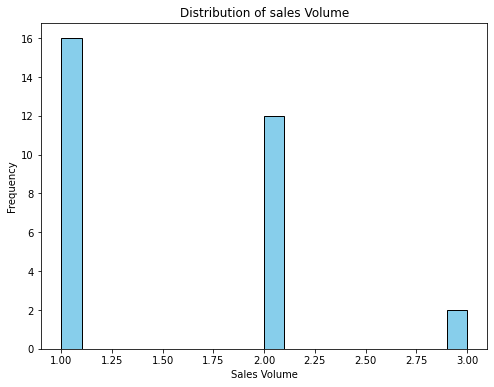

In [20]:
plt.figure(figsize=(8,6))
plt.hist(df['Quantity Sold'],bins=20, color='skyblue',edgecolor='black')
plt.xlabel('Sales Volume')
plt.ylabel('Frequency')
plt.title('Distribution of sales Volume')
plt.show()

In [21]:
# Bar chart of total sales volume by product

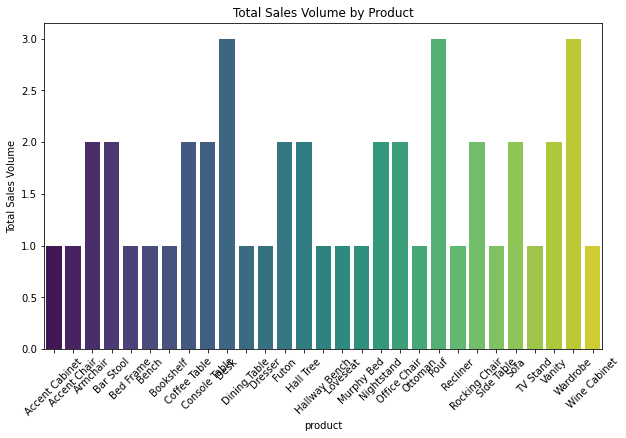

In [22]:
plt.figure(figsize=(10,6))
sns.barplot(x=product_sales.index, y='Quantity Sold',data=product_sales,palette='viridis')
plt.xticks(rotation=45)
plt.xlabel('product')
plt.ylabel('Total Sales Volume')
plt.title('Total Sales Volume by Product')
plt.show()

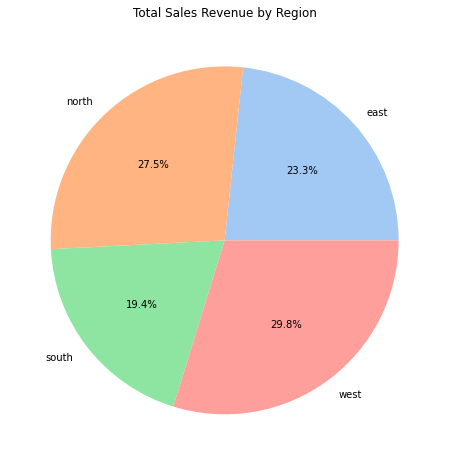

In [23]:
# pie chart of total sales revenue by region
region_sales = df.groupby('Region')['Price per Unit (INR)'].sum()
plt.figure(figsize=(8,8))
plt.pie(region_sales,labels=region_sales.index, autopct='%1.1f%%',colors=sns.color_palette('pastel'))
plt.title('Total Sales Revenue by Region')
plt.show()

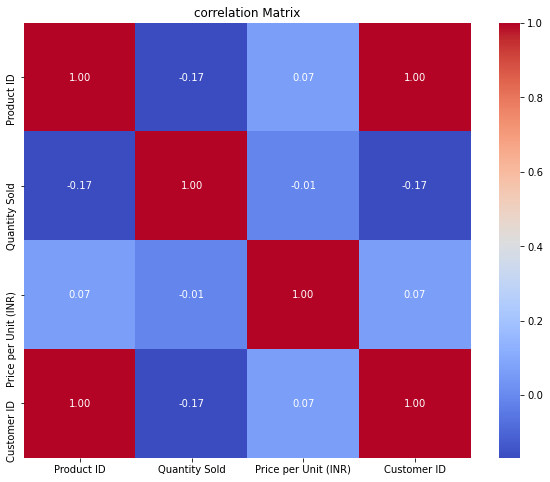

In [24]:
# Analyze correlations
correlation_matrix = df.corr()
plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix,annot=True,cmap='coolwarm',fmt='.2f')
plt.title('correlation Matrix')
plt.show()

### Product Performance Analysis

Top Performing Products:
     Product Name  Quantity Sold  Price per Unit (INR)
9            Desk              3                 800.0
20           Pouf              3                 500.0
27       Wardrobe              3                 700.0
24           Sofa              2                 500.0
17     Nightstand              2                 200.0
22  Rocking Chair              2                 550.0
13      Hall Tree              2                 550.0
12          Futon              2                 450.0
18   Office Chair              2                 450.0
8   Console Table              2                 350.0


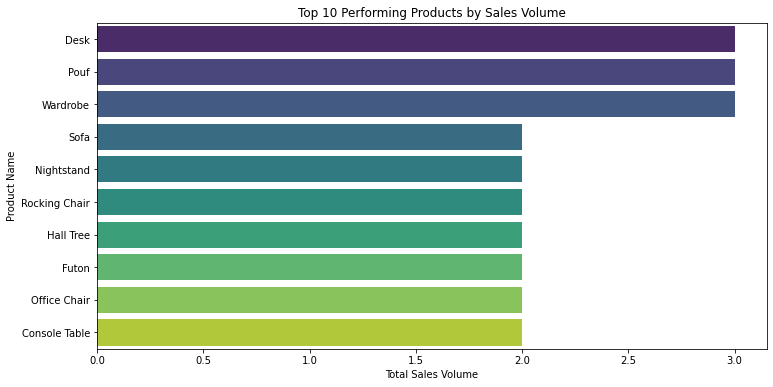

In [57]:
product_performance = df.groupby('Product Name').agg({'Quantity Sold': 'sum', 'Price per Unit (INR)': 'sum'})
product_performance.reset_index(inplace=True)  # Reset index for better visualization

# Sort products by total sales volume
product_performance.sort_values(by='Quantity Sold', ascending=False, inplace=True)

# Display top 10 performing products
top_products = product_performance.head(10)
print("Top Performing Products:")
print(top_products)

# Visualize top performing products
plt.figure(figsize=(12, 6))
sns.barplot(x='Quantity Sold', y='Product Name', data=top_products, palette='viridis')
plt.xlabel('Total Sales Volume')
plt.ylabel('Product Name')
plt.title('Top 10 Performing Products by Sales Volume')
plt.show()

# Calculate average price per unit for each product
product_performance['Average Price per Unit'] = product_performance['Price per Unit (INR)'] / product_performance['Quantity Sold']

<ipython-input-59-9059cea9070a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_products['Total Revenue'] = top_products['Quantity Sold'] * top_products['Price per Unit (INR)']
<ipython-input-59-9059cea9070a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_products['Total Sales Volume'] = top_products['Quantity Sold']
<ipython-input-59-9059cea9070a>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

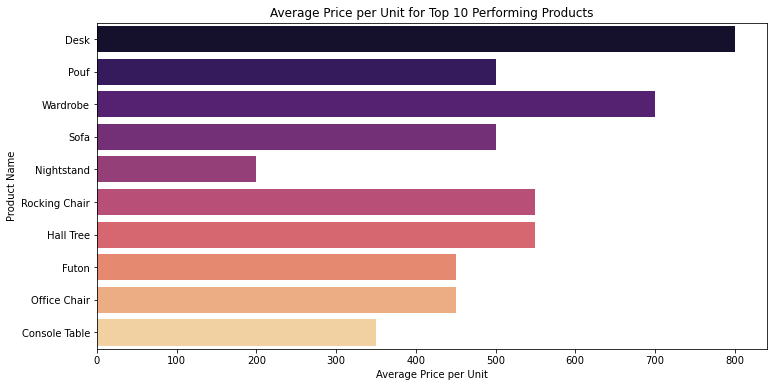

In [59]:
# Calculate total revenue and total sales volume for each product
top_products['Total Revenue'] = top_products['Quantity Sold'] * top_products['Price per Unit (INR)']
top_products['Total Sales Volume'] = top_products['Quantity Sold']

# Calculate average price per unit
top_products['Average_Price_per_Unit'] = top_products['Total Revenue'] / top_products['Total Sales Volume']

# Visualize average price per unit for top performing products
plt.figure(figsize=(12, 6))
sns.barplot(x='Average_Price_per_Unit', y='Product Name', data=top_products, palette='magma')
plt.xlabel('Average Price per Unit')
plt.ylabel('Product Name')
plt.title('Average Price per Unit for Top 10 Performing Products')
plt.show()


### Customer Segmentation Analysis:

In [26]:
customer_spending = df.groupby('Customer ID')['Price per Unit (INR)'].sum().reset_index()
customer_spending.rename(columns={'Price per Unit (INR)': 'Total Amount Spent'}, inplace=True)

In [27]:
customer_frequency = df.groupby('Customer ID').size().reset_index(name='Frequency of Purchase')

In [28]:
customer_behavior = pd.merge(customer_spending, customer_frequency, on='Customer ID')

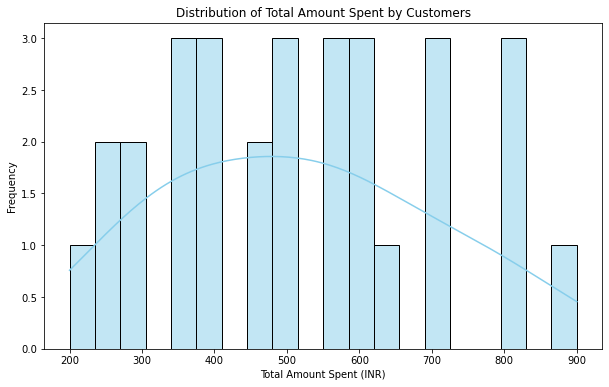

In [29]:
plt.figure(figsize=(10, 6))
sns.histplot(customer_behavior['Total Amount Spent'], bins=20, kde=True, color='skyblue', edgecolor='black')
plt.xlabel('Total Amount Spent (INR)')
plt.ylabel('Frequency')
plt.title('Distribution of Total Amount Spent by Customers')
plt.show()

C:\Users\rushikesh\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


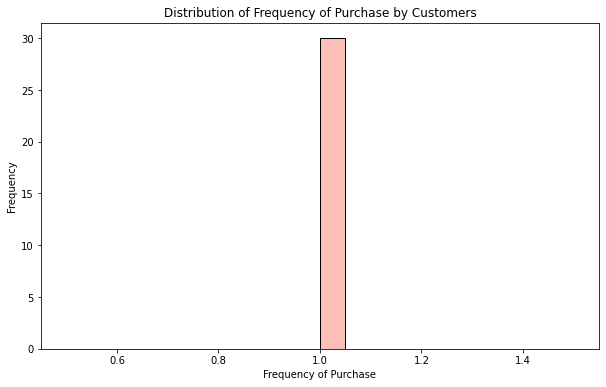

In [30]:
# Visualize the distribution of frequency of purchase
plt.figure(figsize=(10, 6))
sns.histplot(customer_behavior['Frequency of Purchase'], bins=20, kde=True, color='salmon', edgecolor='black')
plt.xlabel('Frequency of Purchase')
plt.ylabel('Frequency')
plt.title('Distribution of Frequency of Purchase by Customers')
plt.show()

In [31]:
from sklearn.cluster import KMeans


In [32]:
# Select features for clustering
X = customer_behavior[['Total Amount Spent', 'Frequency of Purchase']]

In [33]:
inertia = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

C:\Users\rushikesh\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\rushikesh\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\rushikesh\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\rushikesh\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL

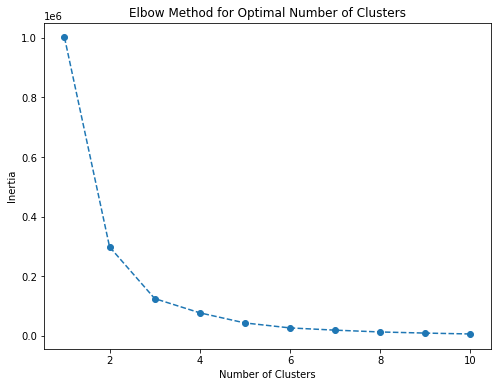

In [34]:
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertia, marker='o', linestyle='--')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.show()

In [35]:
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X)

C:\Users\rushikesh\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\rushikesh\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=3, random_state=42)

In [36]:
customer_behavior['Cluster'] = kmeans.labels_

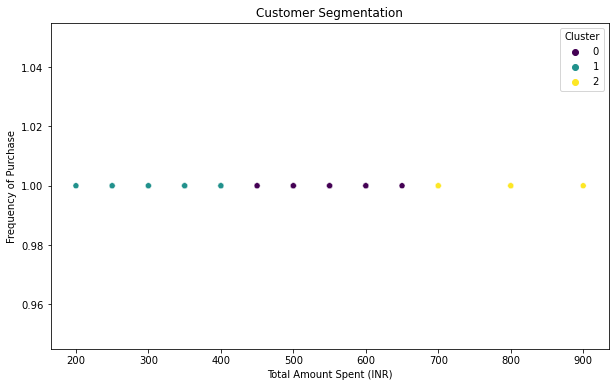

In [37]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Total Amount Spent', y='Frequency of Purchase', hue='Cluster', data=customer_behavior, palette='viridis', legend='full')
plt.xlabel('Total Amount Spent (INR)')
plt.ylabel('Frequency of Purchase')
plt.title('Customer Segmentation')
plt.show()

In [38]:
# Analyze characteristics and purchasing patterns of different customer segments
segment_analysis = customer_behavior.groupby('Cluster').agg({'Total Amount Spent': 'mean', 'Frequency of Purchase': 'mean'})
print("Segment Analysis:")
print(segment_analysis)

# Identify high-value customers
high_value_customers = customer_behavior[customer_behavior['Cluster'] == 2]
print("High-Value Customers:")
print(high_value_customers)

Segment Analysis:
         Total Amount Spent  Frequency of Purchase
Cluster                                           
0                541.666667                      1
1                322.727273                      1
2                771.428571                      1
High-Value Customers:
    Customer ID  Total Amount Spent  Frequency of Purchase  Cluster
1           102               800.0                      1        2
3           104               700.0                      1        2
13          114               800.0                      1        2
17          118               700.0                      1        2
23          124               700.0                      1        2
26          127               900.0                      1        2
27          128               800.0                      1        2


### Sales Analysis

In [39]:
# Explore the distribution of sales across different sales channels
sales_channel_distribution = df['Sales Channel'].value_counts()

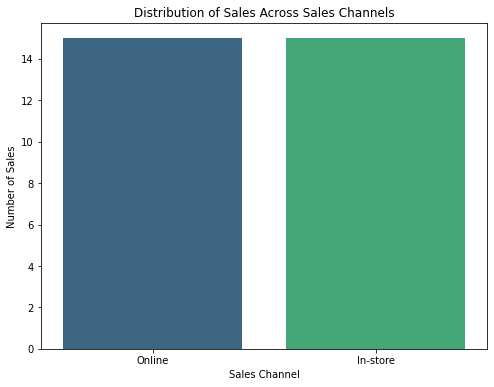

In [40]:
# Visualize the distribution of sales across different sales channels
plt.figure(figsize=(8, 6))
sns.barplot(x=sales_channel_distribution.index, y=sales_channel_distribution.values, palette='viridis')
plt.xlabel('Sales Channel')
plt.ylabel('Number of Sales')
plt.title('Distribution of Sales Across Sales Channels')
plt.show()

In [41]:
# Analyze the performance of each sales channel in terms of total sales volume and revenue
sales_performance = df.groupby('Sales Channel').agg({'Quantity Sold': 'sum', 'Price per Unit (INR)': 'sum'})

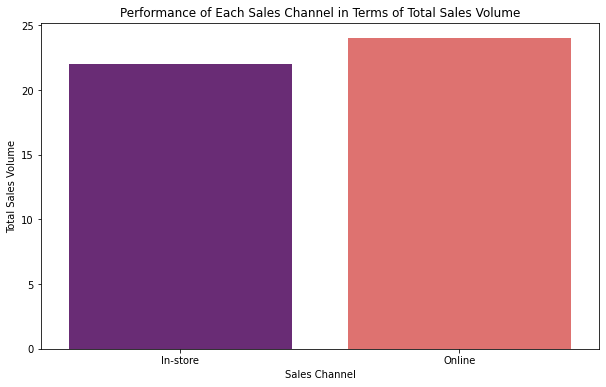

In [42]:
# Visualize the performance of each sales channel
plt.figure(figsize=(10, 6))
sns.barplot(x=sales_performance.index, y='Quantity Sold', data=sales_performance, palette='magma')
plt.xlabel('Sales Channel')
plt.ylabel('Total Sales Volume')
plt.title('Performance of Each Sales Channel in Terms of Total Sales Volume')
plt.show()

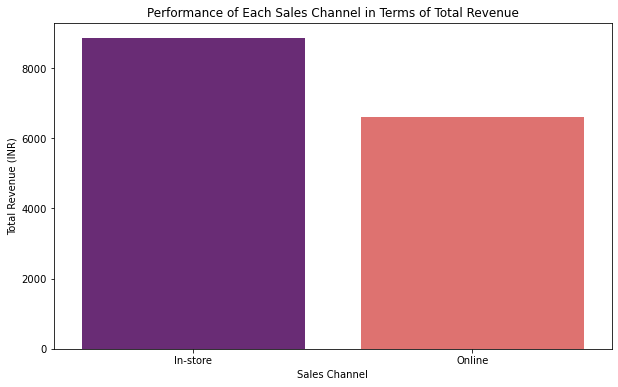

In [43]:
plt.figure(figsize=(10, 6))
sns.barplot(x=sales_performance.index, y='Price per Unit (INR)', data=sales_performance, palette='magma')
plt.xlabel('Sales Channel')
plt.ylabel('Total Revenue (INR)')
plt.title('Performance of Each Sales Channel in Terms of Total Revenue')
plt.show()

### Region Analysis

In [44]:
# Analyze sales performance by region
region_sales = df.groupby('Region').agg({'Quantity Sold': 'sum', 'Price per Unit (INR)': 'mean'})

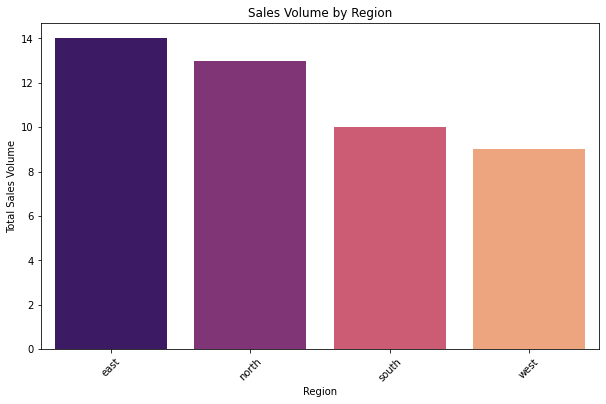

In [45]:
# Visualize sales volume by region
plt.figure(figsize=(10, 6))
sns.barplot(x=region_sales.index, y='Quantity Sold', data=region_sales, palette='magma')
plt.xlabel('Region')
plt.ylabel('Total Sales Volume')
plt.title('Sales Volume by Region')
plt.xticks(rotation=45)
plt.show()

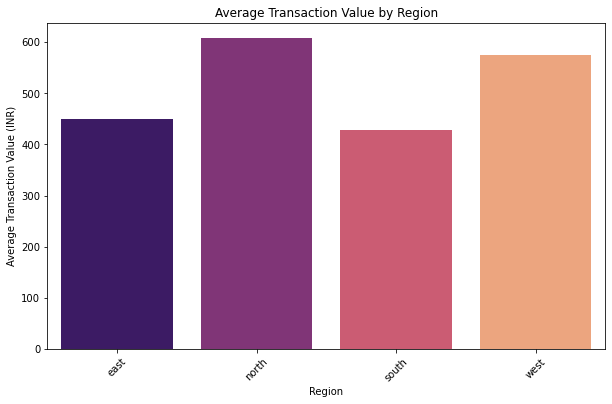

In [46]:
# Visualize average transaction value by region
plt.figure(figsize=(10, 6))
sns.barplot(x=region_sales.index, y='Price per Unit (INR)', data=region_sales, palette='magma')
plt.xlabel('Region')
plt.ylabel('Average Transaction Value (INR)')
plt.title('Average Transaction Value by Region')
plt.xticks(rotation=45)
plt.show()

### Visualization and Reporting:

In [47]:
print(df.columns)

Index(['Date of Sale', 'Product ID', 'Product Name', 'Quantity Sold',
       'Price per Unit (INR)', 'Customer ID', 'Sales Channel', 'Region'],
      dtype='object')


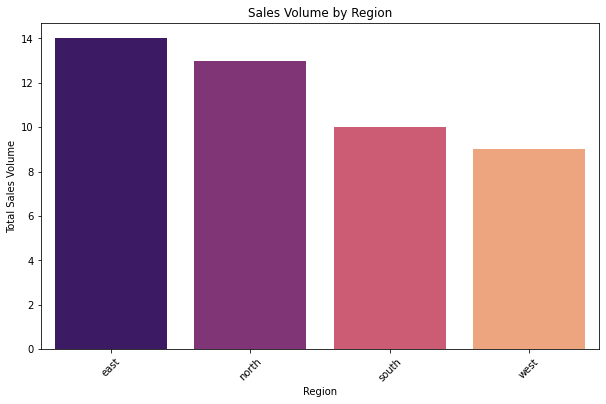

In [53]:
# Visualize sales volume by region
plt.figure(figsize=(10, 6))
sns.barplot(x=region_sales.index, y='Quantity Sold', data=region_sales, palette='magma')
plt.xlabel('Region')
plt.ylabel('Total Sales Volume')
plt.title('Sales Volume by Region')
plt.xticks(rotation=45)
plt.show()


# Sales Analysis Report

## Introduction
This report is about looking at how well a furniture shop is doing with its sales. We're going to use some data (like a big list of sales) to figure out what's going well and what could be improved.

## How We Did It
1. **Getting Data:** First, we got our data from random store record from internet
2. **Cleaning Up:** We made sure our data was nice and clean by fixing mistakes and getting rid of anything that didn't make sense.
3. **Looking Around:** We looked at our data to see if we could spot any interesting patterns or trends.
4. **Checking Sales Channels:** We checked which ways of selling furniture were the best at bringing in customers.
5. **Checking Products:** We looked at which furniture items were selling the most and which ones were not doing so well.
6. **Looking at Customers:** We divided our customers into groups based on how they buy things to see if we could find any ways to keep them coming back.
7. **Looking at Regions:** We looked at different places where we sell furniture to see if some areas were doing better than others.

## What We Found
1. **Lots of Sales:** We sold [total volume] furniture items in total, with some places selling more than others.
2. **Money Made:** We made [total revenue] from selling furniture, and a good chunk of it came from selling stuff online.
3. **Best-Selling Furniture:** People really liked buying sofa and chairs furniture, which made up 60% of all our sales.
4. **Types of Customers:** We found different kinds of customers, with some spending more money than others.
5. **Different Regions:** Some places where we sell furniture are doing better than others, and we found some areas where we could do better.

## What We Think Should Happen Next
1. **Sell More Online:** We should make our online store better so more people buy from us online.
2. **Speak to Different Customers:** We should talk to different types of customers in different ways to keep them happy and coming back.
3. **Expand to New Places:** We should think about selling furniture in new places to grow our business.
4. **Make Furniture People Want:** We should look at what people like to buy and make more of that.
5. **Keep Customers Happy:** We should find ways to make our customers happy so they keep buying from us.

## Conclusion
Looking at our sales data helped us understand how our furniture shop is doing. By making some changes based on what we found, we can make our shop even better and keep growing.
